In [1]:
# !pip install torch
# pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu{12.6}/torch_stable.html
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126
# import torch
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)
# tensor = torch.randn((3, 3))
# tensor = tensor.to('cuda')
#!nvcc --version

## .nc Dateien ##

In [2]:
import xarray
import os
import pandas as pd
from Preprocessing import *

extractor = FileExtractor()

df_dwd_hornsea = extractor.combine_files("nc_files", "dwd_icon_eu_hornsea")
df_dwd_pes = extractor.combine_files("nc_files", "dwd_icon_eu_pes10")
df_dwd_demand = extractor.combine_files("nc_files", "dwd_icon_eu_demand")

ncep_gfs_hornsea = extractor.combine_files("nc_files", "ncep_gfs_hornsea")
ncep_gfs_pes = extractor.combine_files("nc_files", "ncep_gfs_pes10")
ncep_gfs_demand = extractor.combine_files("nc_files", "ncep_gfs_demand")

c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:389: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(aggregate_by in weather_data_1.columns, f"Dimension {aggregate_by} to aggregate by was not found in the first dataset.")
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:390: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(aggregate_by in weather_data_2.columns, f"Dimension {aggregate_by} to aggregate by was not found in the second dataset.")
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:391: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert("datetime" in str(weather_data_1[aggregate_by].dtype), f"First input's dimension to aggregate by ({aggregate_by}) is not properly formatted to datetime.")
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:392: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert("datetime" in str(weather_data_2[aggregate

Visualisierung auf der Karte

<Axes: >

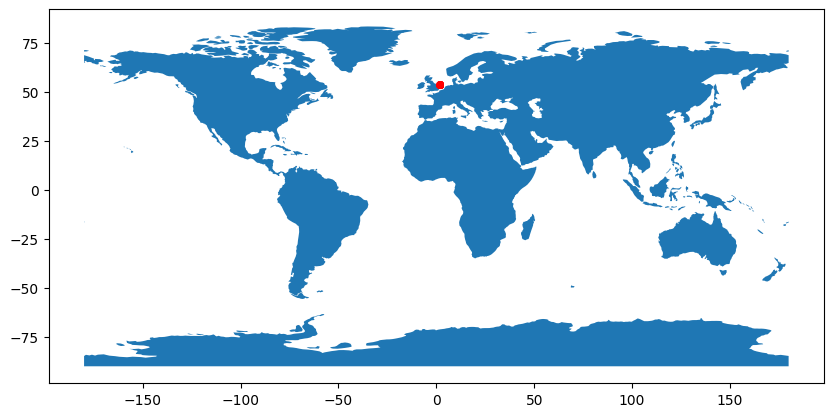

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

df1_ = pd.concat([df_dwd_hornsea.reset_index()[["latitude", "longitude"]].drop_duplicates(), ncep_gfs_hornsea.reset_index()[["latitude", "longitude"]].drop_duplicates()])

geometry = [Point(xy) for xy in zip(df1_['longitude'], df1_['latitude'])]
gdf = GeoDataFrame(df1_, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

In [4]:
ncep_gfs_pes = ncep_gfs_pes.reset_index()

In [5]:
merged_coords = ncep_gfs_pes[ncep_gfs_pes.longitude > 350].merge(ncep_gfs_pes[ncep_gfs_pes.longitude <= 350], on = ["level_0", "level_1", "latitude"])

In [6]:
(merged_coords.CloudCover_x - merged_coords.CloudCover_y).min()

0.0

<Axes: xlabel='level_0', ylabel='CloudCover_x'>

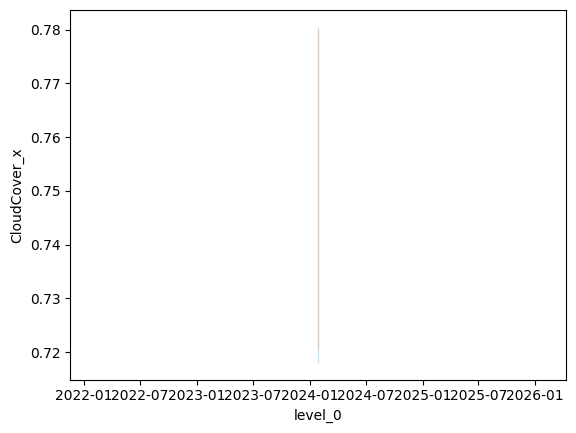

In [7]:
import seaborn as sns

sns.lineplot(merged_coords, x = "level_0", y = "CloudCover_x")
sns.lineplot(merged_coords, x = "level_0", y = "CloudCover_y")

<Axes: >

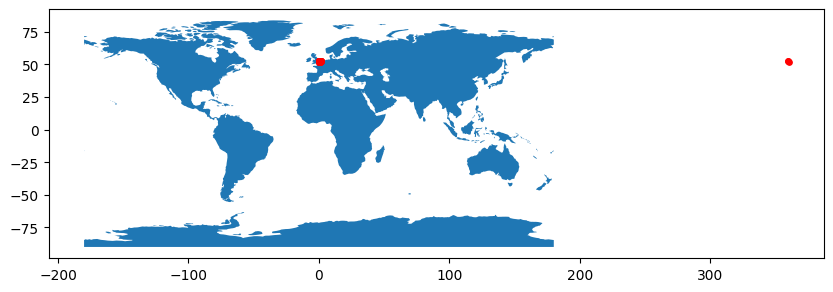

In [8]:
df2_ = pd.concat([df_dwd_pes.reset_index()[["latitude", "longitude"]].drop_duplicates(), ncep_gfs_pes.reset_index()[["latitude", "longitude"]].drop_duplicates()])

geometry = [Point(xy) for xy in zip(df2_['longitude'], df2_['latitude'])]
gdf = GeoDataFrame(df2_, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

<Axes: >

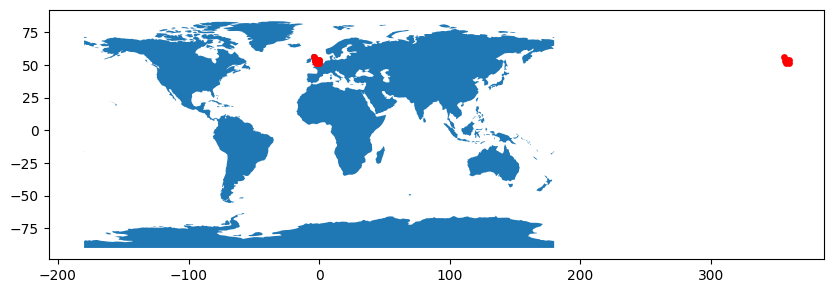

In [9]:
df3_ = pd.concat([df_dwd_demand.reset_index()[["latitude", "longitude"]].drop_duplicates(), ncep_gfs_demand.reset_index()[["latitude", "longitude"]].drop_duplicates()])

geometry = [Point(xy) for xy in zip(df3_['longitude'], df3_['latitude'])]
gdf = GeoDataFrame(df3_, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

Gemeinsame Koordinaten für Hornsea

In [10]:
print("DWD")
print(len(df_dwd_hornsea.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(df_dwd_hornsea.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("NCEP GFS")
print(len(ncep_gfs_hornsea.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(ncep_gfs_hornsea.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("Schnittmenge")
print(len(set([*ncep_gfs_hornsea.reset_index().latitude.unique(), *df_dwd_hornsea.reset_index().latitude.unique()])), "verschiedene Breitengradkoordinaten")
print(len(set([*ncep_gfs_hornsea.reset_index().longitude.unique(), *df_dwd_hornsea.reset_index().longitude.unique()])), "verschiedene Längengradkoordinaten")

DWD
5 verschiedene Breitengradkoordinaten.
6 verschiedene Längengradkoordinaten.
NCEP GFS
3 verschiedene Breitengradkoordinaten.
3 verschiedene Längengradkoordinaten.
Schnittmenge
7 verschiedene Breitengradkoordinaten
9 verschiedene Längengradkoordinaten


Gemeinsame Koordinaten für Demand

In [11]:
print("DWD")
print(len(df_dwd_demand.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(df_dwd_demand.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("NCEP GFS")
print(len(ncep_gfs_demand.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(ncep_gfs_demand.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("Schnittmenge")
print(len(set([*ncep_gfs_demand.reset_index().latitude.unique(), *df_dwd_demand.reset_index().latitude.unique()])), "verschiedene Breitengradkoordinaten")
print(len(set([*ncep_gfs_demand.reset_index().longitude.unique(), *df_dwd_demand.reset_index().longitude.unique()])), "verschiedene Längengradkoordinaten")

DWD
7 verschiedene Breitengradkoordinaten.
7 verschiedene Längengradkoordinaten.
NCEP GFS
7 verschiedene Breitengradkoordinaten.
14 verschiedene Längengradkoordinaten.
Schnittmenge
7 verschiedene Breitengradkoordinaten
14 verschiedene Längengradkoordinaten


Gemeinsame Koordinaten für PES

In [12]:
print("DWD")
print(len(df_dwd_pes.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(df_dwd_pes.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("NCEP GFS")
print(len(ncep_gfs_pes.reset_index().latitude.unique()), "verschiedene Breitengradkoordinaten.")
print(len(ncep_gfs_pes.reset_index().longitude.unique()), "verschiedene Längengradkoordinaten.")
print("Schnittmenge")
print(len(set([*ncep_gfs_pes.reset_index().latitude.unique(), *df_dwd_pes.reset_index().latitude.unique()])), "verschiedene Breitengradkoordinaten")
print(len(set([*ncep_gfs_pes.reset_index().longitude.unique(), *df_dwd_pes.reset_index().longitude.unique()])), "verschiedene Längengradkoordinaten")

DWD
19 verschiedene Breitengradkoordinaten.
20 verschiedene Längengradkoordinaten.
NCEP GFS
19 verschiedene Breitengradkoordinaten.
23 verschiedene Längengradkoordinaten.
Schnittmenge
19 verschiedene Breitengradkoordinaten
23 verschiedene Längengradkoordinaten


In [13]:
import numpy as np
import dask.dataframe as dd
import math

preprocesser = Preprocessing()

df_dwd_hornsea = preprocesser.preprocess_geo_data(df_dwd_hornsea)
ncep_gfs_hornsea = preprocesser.preprocess_geo_data(ncep_gfs_hornsea)
df_dwd_pes = preprocesser.preprocess_geo_data(df_dwd_pes)
ncep_gfs_pes = preprocesser.preprocess_geo_data(ncep_gfs_pes)
df_dwd_demand = preprocesser.preprocess_geo_data(df_dwd_demand)
ncep_gfs_demand = preprocesser.preprocess_geo_data(ncep_gfs_demand)

c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[mask] = df[mask].fillna(grouped_means)
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[mask] = df[mask].fillna(grouped_means)
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [14]:
hornsea = preprocesser.merge_weather_stations_data(df_dwd_hornsea, ncep_gfs_hornsea)
demand = preprocesser.merge_weather_stations_data(df_dwd_demand, ncep_gfs_demand)
pes = preprocesser.merge_weather_stations_data(df_dwd_pes, ncep_gfs_pes)

In [15]:
pes[["CloudCover", "SolarDownwardRadiation", "Temperature"]].corr()

CloudCover  SolarDownwardRadiation  Temperature
CloudCover                1.000000               -0.135624     0.077122
SolarDownwardRadiation   -0.135624                1.000000     0.474985
Temperature               0.077122                0.474985     1.000000

## .JSON Dateien ##

In den JSON-Dateien befinden sich Informationen zu (un-)geplanten Ausfällen auf der Windkraftanlage HORNSEA.

In [16]:
import json

json_data = extractor.extract_json_files("nc_files/REMIT")

In [17]:
json_data.head()

id dataset                                mrid  revisionNumber  \
0  17116   REMIT  11XDONG-PT-----2-NGET-RMT-00001689               1   
1  17326   REMIT  11XDONG-PT-----2-NGET-RMT-00001689               2   
2  17618   REMIT  11XDONG-PT-----2-NGET-RMT-00001695               1   
3  18969   REMIT  11XDONG-PT-----2-NGET-RMT-00001695               2   
4  19014   REMIT  11XDONG-PT-----2-NGET-RMT-00001701               1   

            publishTime           createdTime  \
0  2023-07-17T10:42:04Z  2023-07-17T10:35:00Z   
1  2023-07-18T14:12:03Z  2023-07-18T14:07:00Z   
2  2023-07-20T03:06:40Z  2023-07-19T07:50:00Z   
3  2023-07-24T07:00:04Z  2023-07-24T06:55:00Z   
4  2023-07-24T11:00:04Z  2023-07-24T10:55:00Z   

                               messageType     messageHeading  \
0  UnavailabilitiesOfElectricityFacilities  REMIT Information   
1  UnavailabilitiesOfElectricityFacilities  REMIT Information   
2  UnavailabilitiesOfElectricityFacilities  REMIT Information   
3  UnavailabilitiesOfElectricityFacilities  REMIT Information   
4  UnavailabilitiesOfElectricityFacilities  REMIT Information   

                   eventType unavailabilityType  ...       fuelType  \
0  Production unavailability            Planned  ...  Wind Offshore   
1  Production unavailability            Planned  ...  Wind Offshore   
2  Production unavailability            Planned  ...  Wind Offshore   
3  Production unavailability            Planned  ...  Wind Offshore   
4  Production unavailability            Planned  ...  Wind Offshore   

  normalCapacity availableCapacity unavailableCapacity eventStatus  \
0            400                 0                 400      Active   
1            400                 0                 400      Active   
2            400                 0                 400      Active   
3            400                 0                 400      Active   
4            400                 0                 400      Active   

         eventStartTime          eventEndTime           cause  \
0  2023-07-18T08:00:00Z  2023-07-18T14:00:00Z  Planned Outage   
1  2023-07-18T08:00:00Z  2023-07-18T16:00:00Z  Planned Outage   
2  2023-07-24T06:00:00Z  2023-07-24T14:00:00Z  Planned Outage   
3  2023-07-24T06:00:00Z  2023-07-24T08:00:00Z  Planned Outage   
4  2023-07-25T06:00:00Z  2023-07-25T14:00:00Z  Planned Outage   

                                       outageProfile  relatedInformation  
0  [{'startTime': '2023-07-18T08:00:00Z', 'endTim...                 NaN  
1  [{'startTime': '2023-07-18T08:00:00Z', 'endTim...                 NaN  
2  [{'startTime': '2023-07-24T06:00:00Z', 'endTim...                 NaN  
3  [{'startTime': '2023-07-24T06:00:00Z', 'endTim...                 NaN  
4  [{'startTime': '2023-07-25T06:00:00Z', 'endTim...                 NaN  

[5 rows x 28 columns]

In [18]:
# df_outage = pd.DataFrame()

# for id, x in json_data[["id", "outageProfile"]].iterrows():
#     now_id = x["id"]
#     for y in x["outageProfile"]:
#         y["id"] = now_id
#         df_outage = pd.concat([df_outage, pd.json_normalize(y)])

# df_outage

Die JSON-Datei enthält Informationen zu geplanten oder unerwarteten Ausfällen in der Windkraftanlage HORNSEA. Jede Zeile beschreibt einen Vorfall und dessen Beginn und Abschluss. 

Daher wird jede Zeile genutzt, um aus der Dauer zwischen Anfang und Beginn eines Ausfalls ein Zeitintervallindex zu erstellen mit einem Intervall von 30 Minuten. Anschließend wird dieser neue Datensatz mit den HORNSEA-Daten zusammengefügt.

In [19]:
outages_df = preprocesser.preprocess_outage_data(json_data)

c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data.drop(columns = ["id", "outageProfile", "assetId", "affectedUnitEIC", "dataset", "eventStatus", "cause", "publishTime", "createdTime", "relatedInformation", "revisionNumber", "mrid"], axis = 1, inplace = True)
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data.drop(columns = col, inplace = True, axis = 1)
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [20]:
import plotly.express as px

px.scatter(outages_df[["affectedUnit", "unavailabilityType"]], color = "unavailabilityType", title = "Ausfallszeiträume der HORNSEA-Windkraftanlagen")

## .csv Dateien ##

In [21]:
import pandas as pd
import os

In [22]:
df_energy = extractor.combine_files("csv_files", "Energy_data", ".csv")

In [23]:
df_energy

dtm    MIP  Solar_MW  Solar_capacity_mwp  \
0     2020-09-20T00:00:00Z  20.06       0.0         2108.489754   
1     2020-09-20T00:30:00Z  19.77       0.0         2108.489754   
2     2020-09-20T01:00:00Z  28.68       0.0         2108.489754   
3     2020-09-20T01:30:00Z  28.97       0.0         2108.489754   
4     2020-09-20T02:00:00Z  28.19       0.0         2108.489754   
...                    ...    ...       ...                 ...   
5851  2024-05-19T21:30:00Z  77.40       0.0         2573.542092   
5852  2024-05-19T22:00:00Z  80.82       0.0         2573.542092   
5853  2024-05-19T22:30:00Z  75.69       0.0         2573.542092   
5854  2024-05-19T23:00:00Z  78.98       0.0         2573.542092   
5855  2024-05-19T23:30:00Z  78.44       0.0         2573.482016   

      Solar_installedcapacity_mwp  Wind_MW   SS_Price  boa_MWh  DA_Price  
0                     2206.064655  996.284    2.50000      0.0     32.17  
1                     2206.064655  957.576   15.00000      0.0     32.17  
2                     2206.064655  941.044   47.95000      0.0     32.00  
3                     2206.064655  964.366   29.13000      0.0     32.00  
4                     2206.064655  918.432   28.95000      0.0     31.99  
...                           ...      ...        ...      ...       ...  
5851                  2741.831037  227.518   56.20000      0.0     76.81  
5852                  2741.831037  197.090  102.00023      0.0     71.11  
5853                  2741.831037  171.306   99.00000      0.0     71.11  
5854                  2741.831037  163.164  106.44988      0.0     66.51  
5855                  2741.831037  178.092   70.67000      0.0     66.51  

[112858 rows x 9 columns]

In [24]:
df_energy.head()

dtm    MIP  Solar_MW  Solar_capacity_mwp  \
0  2020-09-20T00:00:00Z  20.06       0.0         2108.489754   
1  2020-09-20T00:30:00Z  19.77       0.0         2108.489754   
2  2020-09-20T01:00:00Z  28.68       0.0         2108.489754   
3  2020-09-20T01:30:00Z  28.97       0.0         2108.489754   
4  2020-09-20T02:00:00Z  28.19       0.0         2108.489754   

   Solar_installedcapacity_mwp  Wind_MW  SS_Price  boa_MWh  DA_Price  
0                  2206.064655  996.284      2.50      0.0     32.17  
1                  2206.064655  957.576     15.00      0.0     32.17  
2                  2206.064655  941.044     47.95      0.0     32.00  
3                  2206.064655  964.366     29.13      0.0     32.00  
4                  2206.064655  918.432     28.95      0.0     31.99

In [25]:
df_energy = preprocesser.preprocess_energy_data(df_energy)

Kombination von csv- und JSON-Dateien

In [26]:
pd.set_option('future.no_silent_downcasting', True)

energy_with_outages = preprocesser.merge_energy_with_outages(df_energy, outages_df)

In [27]:
df_energy.sort_index()

dtm    MIP  Solar_MWh_credit  Solar_capacity_mwp  \
0     2020-09-20 00:00:00+00:00  20.06               0.0         2108.489754   
0     2020-09-20 00:00:00+00:00  20.06               0.0         2130.537493   
0     2024-01-19 00:00:00+00:00  51.13               0.0         2448.350087   
1     2020-09-20 00:30:00+00:00  19.77               0.0         2130.537493   
1     2020-09-20 00:30:00+00:00  19.77               0.0         2108.489754   
...                         ...    ...               ...                 ...   
58363 2024-01-18 21:30:00+00:00  71.24               0.0         2448.407255   
58364 2024-01-18 22:00:00+00:00  70.15               0.0         2448.407255   
58365 2024-01-18 22:30:00+00:00  68.36               0.0         2448.407255   
58366 2024-01-18 23:00:00+00:00  68.77               0.0         2448.407255   
58367 2024-01-18 23:30:00+00:00  59.36               0.0         2448.350098   

       Solar_installedcapacity_mwp  SS_Price  boa_MWh  DA_Price  \
0                      2108.489754   2.50000      0.0     32.17   
0                      2130.537493   2.50000      0.0     32.17   
0                      2448.350087  53.00000      0.0     62.03   
1                      2130.537493  15.00000      0.0     32.17   
1                      2108.489754  15.00000      0.0     32.17   
...                            ...       ...      ...       ...   
58363                  2448.407255  57.49165      0.0     64.75   
58364                  2448.407255  46.14432      0.0     65.88   
58365                  2448.407255  50.00000      0.0     65.88   
58366                  2448.407255  35.00000      0.0     64.74   
58367                  2448.350098  47.71579      0.0     64.74   

       Wind_MWh_credit  unused_Solar_capacity_mwp  sin_month  cos_month  \
0              498.142                2108.489754  -0.866025       -0.5   
0              498.142                2130.537493  -0.866025       -0.5   
0              456.520                2448.350087   0.000000        1.0   
1              478.788                2130.537493  -0.866025       -0.5   
1              478.788                2108.489754  -0.866025       -0.5   
...                ...                        ...        ...        ...   
58363          577.280                2448.407255   0.000000        1.0   
58364          570.510                2448.407255   0.000000        1.0   
58365          583.830                2448.407255   0.000000        1.0   
58366          560.580                2448.407255   0.000000        1.0   
58367          505.920                2448.350098   0.000000        1.0   

        sin_day   cos_day  sin_dayofweek  cos_dayofweek  sin_hour  cos_hour  
0     -0.743145 -0.669131      -0.781831       0.623490  0.000000  1.000000  
0     -0.743145 -0.669131      -0.781831       0.623490  0.000000  1.000000  
0     -0.485302 -0.874347      -0.433884      -0.900969  0.000000  1.000000  
1     -0.743145 -0.669131      -0.781831       0.623490  0.000000  1.000000  
1     -0.743145 -0.669131      -0.781831       0.623490  0.000000  1.000000  
...         ...       ...            ...            ...       ...       ...  
58363 -0.299363 -0.954139       0.433884      -0.900969  0.809017  0.707107  
58364 -0.299363 -0.954139       0.433884      -0.900969  0.743145  0.866025  
58365 -0.299363 -0.954139       0.433884      -0.900969  0.743145  0.866025  
58366 -0.299363 -0.954139       0.433884      -0.900969  0.669131  0.965926  
58367 -0.299363 -0.954139       0.433884      -0.900969  0.669131  0.965926  

[112858 rows x 18 columns]

In [28]:
energy_with_outages.head()

dtm    MIP  Solar_MWh_credit  Solar_capacity_mwp  \
0 2020-09-20 00:00:00+00:00  20.06               0.0         2108.489754   
1 2020-09-20 00:00:00+00:00  20.06               0.0         2130.537493   
2 2020-09-20 00:30:00+00:00  19.77               0.0         2130.537493   
3 2020-09-20 00:30:00+00:00  19.77               0.0         2108.489754   
4 2020-09-20 01:00:00+00:00  28.68               0.0         2108.489754   

   Solar_installedcapacity_mwp  SS_Price  boa_MWh  DA_Price  Wind_MWh_credit  \
0                  2108.489754      2.50      0.0     32.17          498.142   
1                  2130.537493      2.50      0.0     32.17          498.142   
2                  2130.537493     15.00      0.0     32.17          478.788   
3                  2108.489754     15.00      0.0     32.17          478.788   
4                  2108.489754     47.95      0.0     32.00          470.522   

   unused_Solar_capacity_mwp  ...  cos_dayofweek  sin_hour  cos_hour  \
0                2108.489754  ...        0.62349  0.000000  1.000000   
1                2130.537493  ...        0.62349  0.000000  1.000000   
2                2130.537493  ...        0.62349  0.000000  1.000000   
3                2108.489754  ...        0.62349  0.000000  1.000000   
4                2108.489754  ...        0.62349  0.104528  0.965926   

   unavailabilityType  affectedUnit  availableCapacity  unavailableCapacity  \
0                None          None              400.0                  0.0   
1                None          None              400.0                  0.0   
2                None          None              400.0                  0.0   
3                None          None              400.0                  0.0   
4                None          None              400.0                  0.0   

   hoursSinceOutage hoursUntilOutageEnd outage  
0               0.0                 0.0      0  
1               0.0                 0.0      0  
2               0.0                 0.0      0  
3               0.0                 0.0      0  
4               0.0                 0.0      0  

[5 rows x 25 columns]

Kombination mit CDF-Dateien

In [29]:
# merged_hornsea = preprocesser.merge_geo_energy_outage_data(hornsea, energy_with_outages)
# merged_pes = preprocesser.merge_geo_energy_outage_data(pes, energy_with_outages)
# merged_demand = preprocesser.merge_geo_energy_outage_data(demand, energy_with_outages)

merged_hornsea = preprocesser.merge_geo_energy_outage_data(hornsea, df_energy)
merged_pes = preprocesser.merge_geo_energy_outage_data(pes, df_energy)
merged_demand = preprocesser.merge_geo_energy_outage_data(demand, df_energy)

In [30]:
merged_pes.head()

CloudCover  SolarDownwardRadiation  Temperature  \
dtm                                                                          
2020-09-20 00:00:00+00:00    0.238203                     0.0    13.793095   
2020-09-20 00:00:00+00:00    0.238203                     0.0    13.793095   
2020-09-20 00:30:00+00:00    0.249805                     0.0    13.782727   
2020-09-20 00:30:00+00:00    0.261407                     0.0    13.772360   
2020-09-20 01:00:00+00:00    0.273009                     0.0    13.761992   

                           forecast_horizon  CloudCover_std  \
dtm                                                           
2020-09-20 00:00:00+00:00          0.000000        0.087174   
2020-09-20 00:00:00+00:00          0.000000        0.087174   
2020-09-20 00:30:00+00:00          0.333333        0.087174   
2020-09-20 00:30:00+00:00          0.666667        0.087174   
2020-09-20 01:00:00+00:00          1.000000        0.087174   

                           SolarDownwardRadiation_std  Temperature_std  \
dtm                                                                      
2020-09-20 00:00:00+00:00                  207.424969         2.595224   
2020-09-20 00:00:00+00:00                  207.424969         2.595224   
2020-09-20 00:30:00+00:00                  207.424969         2.595224   
2020-09-20 00:30:00+00:00                  207.424969         2.595224   
2020-09-20 01:00:00+00:00                  207.424969         2.595224   

                           CloudCover_mean  SolarDownwardRadiation_mean  \
dtm                                                                       
2020-09-20 00:00:00+00:00         0.215528                   161.913204   
2020-09-20 00:00:00+00:00         0.215528                   161.913204   
2020-09-20 00:30:00+00:00         0.215528                   161.913204   
2020-09-20 00:30:00+00:00         0.215528                   161.913204   
2020-09-20 01:00:00+00:00         0.215528                   161.913204   

                           Temperature_mean  ...  Wind_MWh_credit  \
dtm                                          ...                    
2020-09-20 00:00:00+00:00         15.856665  ...          498.142   
2020-09-20 00:00:00+00:00         15.856665  ...          498.142   
2020-09-20 00:30:00+00:00         15.856665  ...          478.788   
2020-09-20 00:30:00+00:00         15.856665  ...          478.788   
2020-09-20 01:00:00+00:00         15.856665  ...          470.522   

                           unused_Solar_capacity_mwp  sin_month  cos_month  \
dtm                                                                          
2020-09-20 00:00:00+00:00                2108.489754  -0.866025       -0.5   
2020-09-20 00:00:00+00:00                2130.537493  -0.866025       -0.5   
2020-09-20 00:30:00+00:00                2130.537493  -0.866025       -0.5   
2020-09-20 00:30:00+00:00                2108.489754  -0.866025       -0.5   
2020-09-20 01:00:00+00:00                2108.489754  -0.866025       -0.5   

                            sin_day   cos_day  sin_dayofweek  cos_dayofweek  \
dtm                                                                           
2020-09-20 00:00:00+00:00 -0.743145 -0.669131      -0.781831        0.62349   
2020-09-20 00:00:00+00:00 -0.743145 -0.669131      -0.781831        0.62349   
2020-09-20 00:30:00+00:00 -0.743145 -0.669131      -0.781831        0.62349   
2020-09-20 00:30:00+00:00 -0.743145 -0.669131      -0.781831        0.62349   
2020-09-20 01:00:00+00:00 -0.743145 -0.669131      -0.781831        0.62349   

                           sin_hour  cos_hour  
dtm                                            
2020-09-20 00:00:00+00:00  0.000000  1.000000  
2020-09-20 00:00:00+00:00  0.000000  1.000000  
2020-09-20 00:30:00+00:00  0.000000  1.000000  
2020-09-20 00:30:00+00:00  0.000000  1.000000  
2020-09-20 01:00:00+00:00  0.104528  0.965926  

[5 rows x 36 columns]

In [31]:
merged_hornsea = preprocesser.add_difference_features(merged_hornsea)
merged_pes = preprocesser.add_difference_features(merged_pes)
merged_demand = preprocesser.add_difference_features(merged_demand)

In [32]:
merged_pes.head()

CloudCover  SolarDownwardRadiation  Temperature  \
dtm                                                                          
2020-09-20 00:00:00+00:00    0.238203                     0.0    13.793095   
2020-09-20 00:00:00+00:00    0.238203                     0.0    13.793095   
2020-09-20 00:30:00+00:00    0.249805                     0.0    13.782727   
2020-09-20 00:30:00+00:00    0.261407                     0.0    13.772360   
2020-09-20 01:00:00+00:00    0.273009                     0.0    13.761992   

                           forecast_horizon  CloudCover_std  \
dtm                                                           
2020-09-20 00:00:00+00:00          0.000000        0.087174   
2020-09-20 00:00:00+00:00          0.000000        0.087174   
2020-09-20 00:30:00+00:00          0.333333        0.087174   
2020-09-20 00:30:00+00:00          0.666667        0.087174   
2020-09-20 01:00:00+00:00          1.000000        0.087174   

                           SolarDownwardRadiation_std  Temperature_std  \
dtm                                                                      
2020-09-20 00:00:00+00:00                  207.424969         2.595224   
2020-09-20 00:00:00+00:00                  207.424969         2.595224   
2020-09-20 00:30:00+00:00                  207.424969         2.595224   
2020-09-20 00:30:00+00:00                  207.424969         2.595224   
2020-09-20 01:00:00+00:00                  207.424969         2.595224   

                           CloudCover_mean  SolarDownwardRadiation_mean  \
dtm                                                                       
2020-09-20 00:00:00+00:00         0.215528                   161.913204   
2020-09-20 00:00:00+00:00         0.215528                   161.913204   
2020-09-20 00:30:00+00:00         0.215528                   161.913204   
2020-09-20 00:30:00+00:00         0.215528                   161.913204   
2020-09-20 01:00:00+00:00         0.215528                   161.913204   

                           Temperature_mean  ...   sin_day   cos_day  \
dtm                                          ...                       
2020-09-20 00:00:00+00:00         15.856665  ... -0.743145 -0.669131   
2020-09-20 00:00:00+00:00         15.856665  ... -0.743145 -0.669131   
2020-09-20 00:30:00+00:00         15.856665  ... -0.743145 -0.669131   
2020-09-20 00:30:00+00:00         15.856665  ... -0.743145 -0.669131   
2020-09-20 01:00:00+00:00         15.856665  ... -0.743145 -0.669131   

                           sin_dayofweek  cos_dayofweek  sin_hour  cos_hour  \
dtm                                                                           
2020-09-20 00:00:00+00:00      -0.781831        0.62349  0.000000  1.000000   
2020-09-20 00:00:00+00:00      -0.781831        0.62349  0.000000  1.000000   
2020-09-20 00:30:00+00:00      -0.781831        0.62349  0.000000  1.000000   
2020-09-20 00:30:00+00:00      -0.781831        0.62349  0.000000  1.000000   
2020-09-20 01:00:00+00:00      -0.781831        0.62349  0.104528  0.965926   

                           Temperature_diff  MIP_diff  CloudCover_diff  \
dtm                                                                      
2020-09-20 00:00:00+00:00          0.000000      0.00         0.000000   
2020-09-20 00:00:00+00:00          0.000000      0.00         0.000000   
2020-09-20 00:30:00+00:00         -0.010367     -0.29         0.011602   
2020-09-20 00:30:00+00:00         -0.010367      0.00         0.011602   
2020-09-20 01:00:00+00:00         -0.010367      8.91         0.011602   

                           SolarDownwardRadiation_diff  
dtm                                                     
2020-09-20 00:00:00+00:00                          0.0  
2020-09-20 00:00:00+00:00                          0.0  
2020-09-20 00:30:00+00:00                          0.0  
2020-09-20 00:30:00+00:00                          0.0  
2020-09-20 01:00:00+00:00                          0.0  

[5 rows x 40 co

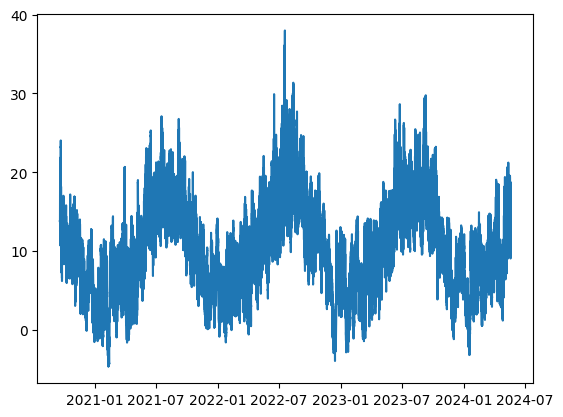

In [33]:
import matplotlib.pyplot as plt

plt.plot(merged_pes.index, merged_pes["Temperature"])

## Feature Engineering ##

In [34]:
merged_hornsea.columns

Index(['RelativeHumidity', 'Temperature', 'WindSpeed', 'WindSpeed:100',
       'forecast_horizon', 'RelativeHumidity_std', 'Temperature_std',
       'WindDirection_std', 'WindDirection:100_std', 'WindSpeed_std',
       'WindSpeed:100_std', 'RelativeHumidity_mean', 'Temperature_mean',
       'WindDirection_mean', 'WindDirection:100_mean', 'WindSpeed_mean',
       'WindSpeed:100_mean', 'RelativeHumidity_min', 'Temperature_min',
       'WindDirection_min', 'WindDirection:100_min', 'WindSpeed_min',
       'WindSpeed:100_min', 'RelativeHumidity_max', 'Temperature_max',
       'WindDirection_max', 'WindDirection:100_max', 'WindSpeed_max',
       'WindSpeed:100_max', 'WindSpeed_range', 'WindSpeed:100_range',
       'WindSpeedAltitudeDiff', 'WindDirection_sin', 'WindDirection_cos',
       'WindDirection:100_sin', 'WindDirection:100_cos', 'Temperature_range',
       'MIP', 'Solar_MWh_credit', 'Solar_capacity_mwp',
       'Solar_installedcapacity_mwp', 'SS_Price', 'boa_MWh', 'DA_Price',
       '

In [35]:
merged_pes.columns

Index(['CloudCover', 'SolarDownwardRadiation', 'Temperature',
       'forecast_horizon', 'CloudCover_std', 'SolarDownwardRadiation_std',
       'Temperature_std', 'CloudCover_mean', 'SolarDownwardRadiation_mean',
       'Temperature_mean', 'CloudCover_min', 'SolarDownwardRadiation_min',
       'Temperature_min', 'CloudCover_max', 'SolarDownwardRadiation_max',
       'Temperature_max', 'SolarDownwardRadiation_range',
       'Interaction_SolarDownwardRadiation_Temperature', 'Temperature_range',
       'MIP', 'Solar_MWh_credit', 'Solar_capacity_mwp',
       'Solar_installedcapacity_mwp', 'SS_Price', 'boa_MWh', 'DA_Price',
       'Wind_MWh_credit', 'unused_Solar_capacity_mwp', 'sin_month',
       'cos_month', 'sin_day', 'cos_day', 'sin_dayofweek', 'cos_dayofweek',
       'sin_hour', 'cos_hour', 'Temperature_diff', 'MIP_diff',
       'CloudCover_diff', 'SolarDownwardRadiation_diff'],
      dtype='object')

In [36]:
from sklearn.preprocessing import OneHotEncoder

# columns_to_ohe = ["unavailabilityType", "affectedUnit"]

# ohe_hornsea = OneHotEncoder(sparse_output = False)
# ohe_hornsea.fit_transform(merged_hornsea[columns_to_ohe])
# ohe_hornsea.get_feature_names_out()

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# encoded = ohe_hornsea.fit_transform(merged_hornsea[columns_to_ohe])
# merged_hornsea[ohe_hornsea.get_feature_names_out()] = encoded
# merged_hornsea.drop(columns = columns_to_ohe, axis = 1, inplace = True)

# encoded = ohe_hornsea.fit_transform(merged_pes[columns_to_ohe])
# merged_pes[ohe_hornsea.get_feature_names_out()] = encoded
# merged_pes.drop(columns = columns_to_ohe, axis = 1, inplace = True)

# lr = LinearRegression()
# rf = RandomForestRegressor()

In [51]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit

X_train, X_test, y_train, y_test = train_test_split(merged_pes.drop(["Solar_MWh_credit", "Wind_MWh_credit"], axis = 1), merged_pes["Solar_MWh_credit"], train_size = 0.7, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size = 0.2, random_state = 42)

In [64]:
ts = TimeSeriesSplit(n_splits = 5)
# the last 10% will be used for the test data set
X_train_val = merged_pes.drop(["Solar_MWh_credit", "Wind_MWh_credit"], axis = 1).iloc[:int(merged_pes.shape[0] * 0.9), :]
y_train_val = merged_pes["Solar_MWh_credit"].iloc[:int(merged_pes.shape[0] * 0.9)]
X_test = merged_pes.drop(["Solar_MWh_credit", "Wind_MWh_credit"], axis = 1).iloc[int(merged_pes.shape[0] * 0.9):, :]
y_test = merged_pes["Solar_MWh_credit"].iloc[int(merged_pes.shape[0] * 0.9):]

In [63]:
for train_index, val_index in ts.split(X_train_val):
    X_train, X_val = X_train_val.iloc[train_index, :], X_train_val.iloc[val_index, :]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

In [38]:
# columns_to_scale = [col for col in X_train.columns if col not in ohe_hornsea.get_feature_names_out()]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

<Axes: >

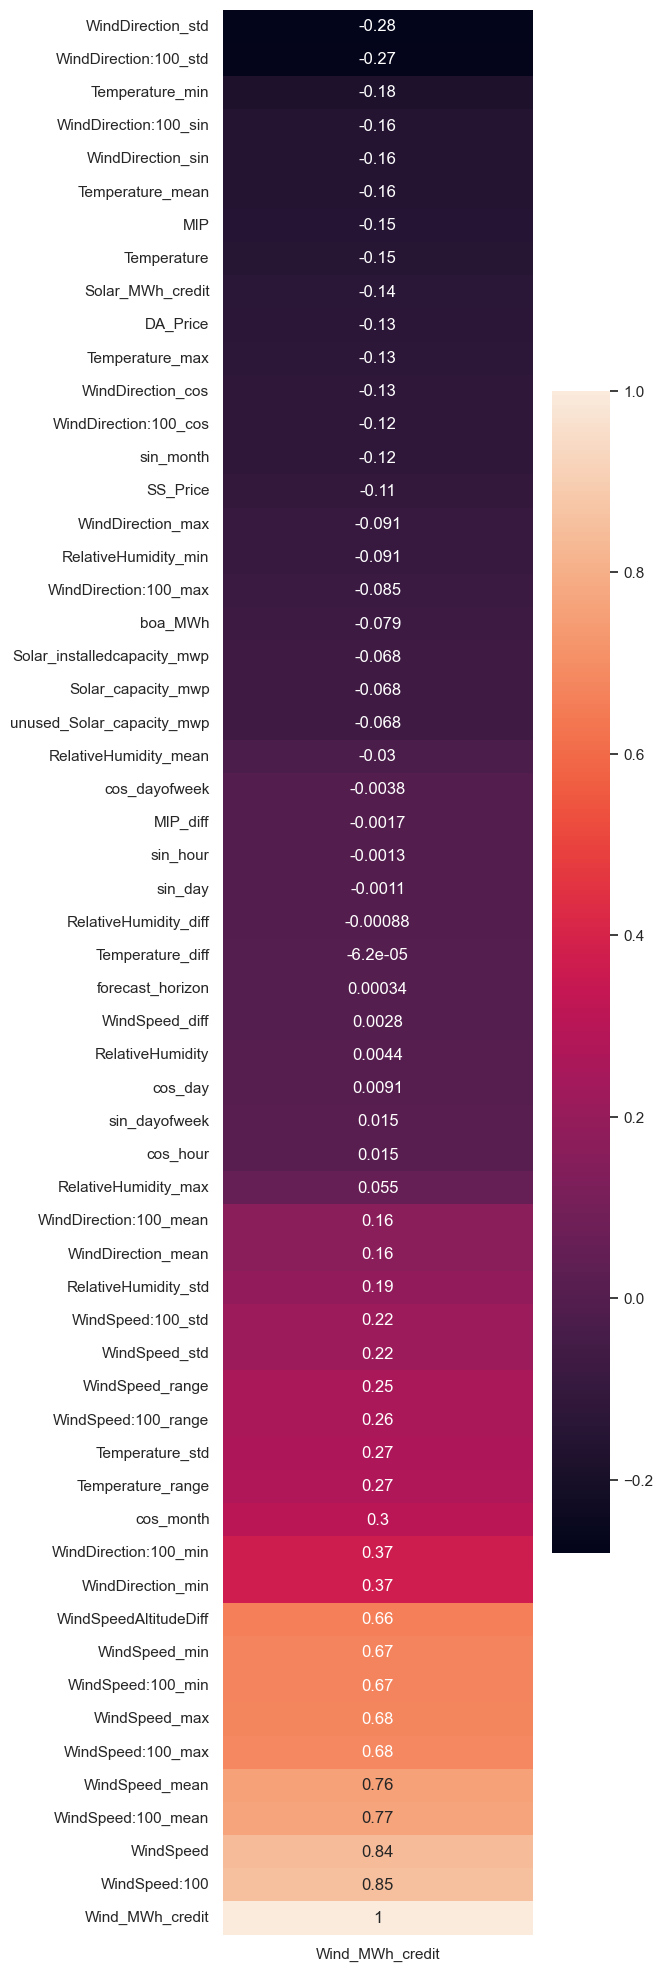

In [39]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(5,25)})
sns.heatmap(merged_hornsea.corr()[["Wind_MWh_credit"]].sort_values(by = "Wind_MWh_credit"), annot = True)

<Axes: >

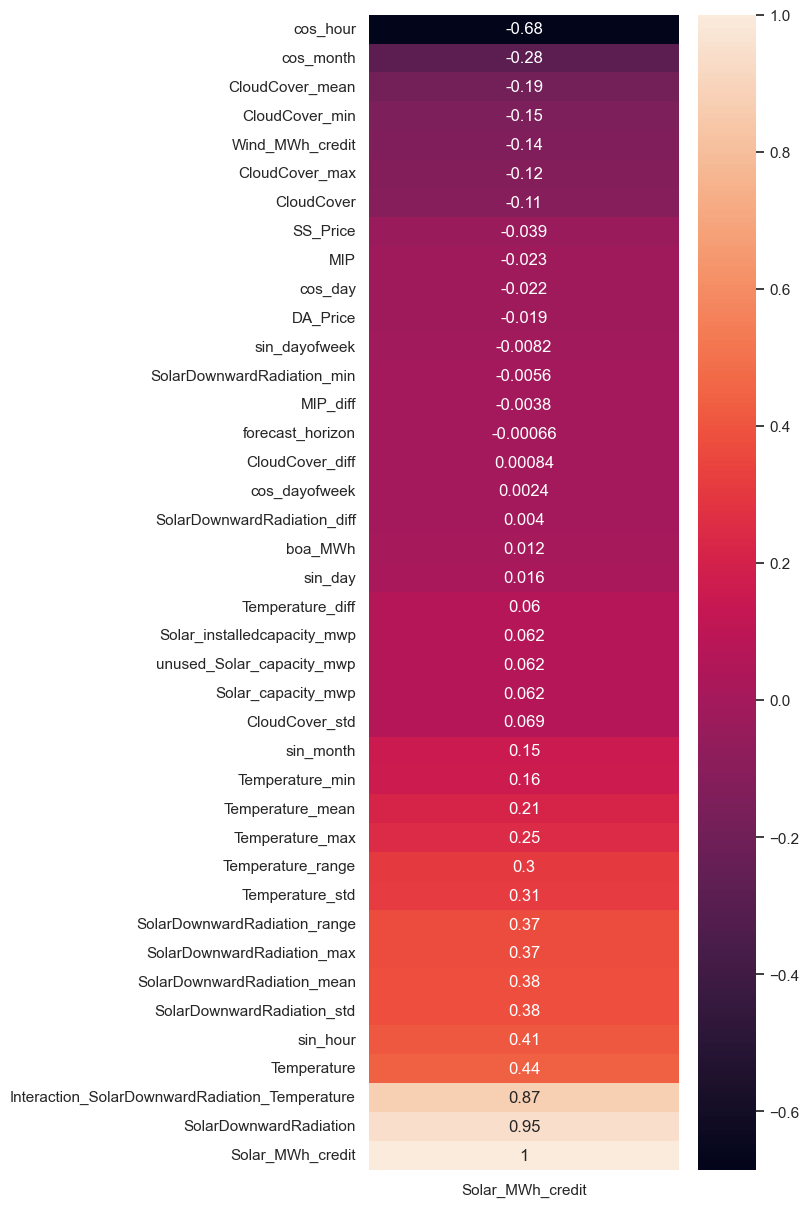

In [40]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(5,15)})
sns.heatmap(merged_pes.corr()[["Solar_MWh_credit"]].sort_values(by = "Solar_MWh_credit"), annot = True)

Modelltraining

RF Quantile

In [41]:
from quantile_forest import RandomForestQuantileRegressor
from sklearn import datasets

qrf = RandomForestQuantileRegressor()
qrf.fit(X_train, y_train)
y_pred_val = qrf.predict(X_val, quantiles=[0.1, 0.5, 0.9])

In [42]:
y_pred_test = qrf.predict(X_test, quantiles=[0.1, 0.5, 0.9])

In [43]:
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_percentage_error as mape, root_mean_squared_error as rmse

pred_val = pd.DataFrame(y_pred_val, index = y_val.index)
r2_score(y_val, pred_val[1])

0.9950677366449993

<Axes: xlabel='dtm', ylabel='Solar_MWh_credit'>

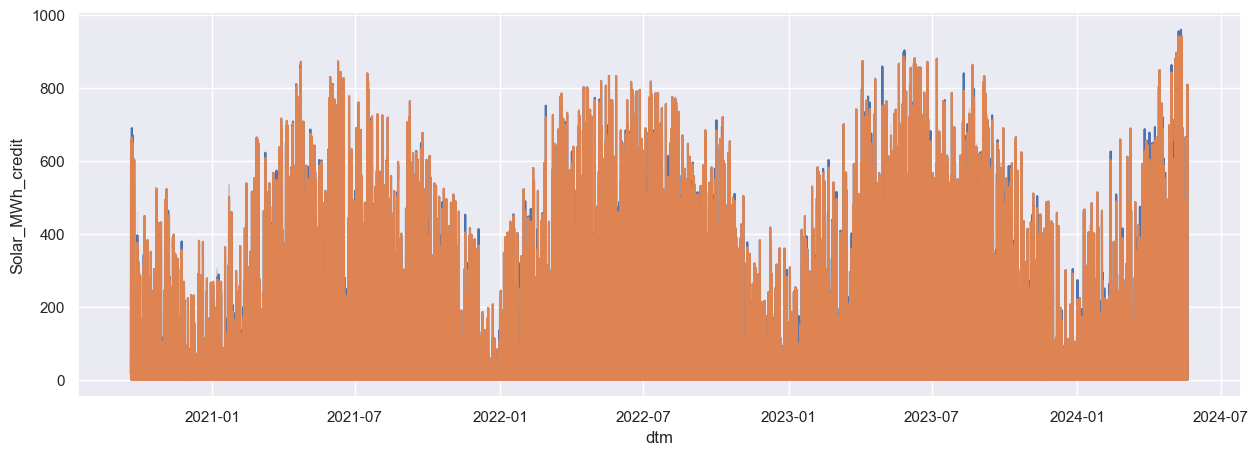

In [44]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(15,5)})
sns.lineplot(y_val)
# sns.lineplot(pred_val[0])
sns.lineplot(pred_val[1])
# sns.lineplot(pred_val[2])

In [60]:
r2_score(y_test, pd.DataFrame(y_pred_test)[1])

0.9525462957735035

Quantile Regressor

In [29]:
from sklearn.linear_model import QuantileRegressor

qr = QuantileRegressor()

quantiles = [x for x in np.arange(0.1, 1.0, 0.1)]

Quantiles NN mit PyTorch

In [80]:
import torch
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

# https://www.kaggle.com/code/carlossouza/quantile-regression-pytorch-tabular-data-only

# https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

class QuantModel(nn.Module):
    def __init__(self, in_tabular_features=9, out_quantiles=3):
        super(QuantModel, self).__init__()
        self.fc1 = nn.Linear(in_tabular_features, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, out_quantiles)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def quantile_loss(preds, target, quantiles):
    assert not target.requires_grad
    assert preds.size(0) == target.size(0)
    losses = []
    for i, q in enumerate(quantiles):
        errors = target - preds[:, i]
        losses.append(torch.max((q - 1) * errors, q * errors).unsqueeze(1))
    loss = torch.mean(torch.sum(torch.cat(losses, dim=1), dim=1))
    return loss

In [79]:
qm = QuantModel(merged_hornsea.shape[1], 10)

In [35]:
predictions = {}
y_test_mean = y_test.mean()
out_bounds_predictions = np.zeros_like(y_test_mean, dtype=np.bool_)

for quantile in quantiles:
    print(quantile)
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X_train, y_train).predict(X_test)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_test
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_test
        )

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


Pinball Score, Quantile

In [99]:
def pinball(y,q,alpha):
    return (y-q)*alpha*(y>=q) + (q-y)*(1-alpha)*(y<q)

def pinball_score(df):
    score = list()
    for qu in range(10,100,10):
        score.append(pinball(y=df["Wind_MWh_credit"],
            q=df[f"q{qu}"],
            alpha=qu/100).mean())
    return sum(score)/len(score)

# pinball_score(modelling_table)

In [97]:
from sklearn.metrics import d2_pinball_score

d2_pinball_score(y_val, pred_val[0])

0.6901798520148822

In [107]:
pinball(y_val, pred_val[1], 0.5).mean()

9.16019739423366

Quantile Regression

https://github.com/dataman-git/codes_for_articles/blob/master/From%20Quantile%20Regression%20to%20Quantile%20Random%20Forests.ipynb

In [89]:
import statsmodels.regression.quantile_regression as Q_reg
import matplotlib.pyplot as plt

quantiles = [0,1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Get the model, the cofficients and the predictions in (a) - (c)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(y_train, X_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['beta','beta_lower','beta_upper','quantile']
    
   # (c) Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return coefs, pred

Qreg_coefs = pd.DataFrame()
Qreg_actual_pred = pd.DataFrame()

# Get the actual and quantile predictions
for q in quantiles:
    print(q)
    coefs, pred = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])
    Qreg_actual_pred = pd.concat([Qreg_actual_pred,pred],axis=1)

Qreg_actual_pred.columns=quantiles
Qreg_actual_pred['actual'] = y_test
Qreg_actual_pred['interval'] = Qreg_actual_pred[0.99] - Qreg_actual_pred[0.01]
Qreg_actual_pred = Qreg_actual_pred.sort_values('interval').reset_index(drop=True)
Qreg_actual_pred

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



KeyboardInterrupt: 

In [92]:
from sklearn.metrics import r2_score

q = 0.5
y_test_pred = Q_reg.QuantReg(y_train, X_train).fit(q=q).predict(X_test)
r2 = r2_score(y_test,y_test_pred)
print('R2 score is {}'.format(r2) )

R2 score is 0.7644583637090195


XBGR Quantile

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Get the model and the predictions in (a) - (b)
def GBM(q):
    
   # (a) Modeling  
   mod = GradientBoostingRegressor(loss='quantile', alpha=q,
                                n_estimators=500, max_depth=8,
                                learning_rate=.01, min_samples_leaf=20,
                                min_samples_split=20)
   mod.fit(X_train, y_train)

   # (b) Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return pred, mod

GBM_models=[]
GBM_actual_pred = pd.DataFrame()

for q in quantiles:
    print(q)
    pred , model = GBM(q)
    GBM_models.append(model)
    GBM_actual_pred = pd.concat([GBM_actual_pred,pred],axis=1)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [123]:
GBM_actual_pred.columns = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
GBM_actual_pred.index = y_test.index

In [130]:
pinball(y_test, GBM_actual_pred[0.5], 0.5).mean()

10.1135174319943

In [120]:
y_test

dtm
2023-04-30 08:00:00+00:00    434.840954
2021-01-16 15:00:00+00:00     19.835695
2021-01-15 11:00:00+00:00     79.792953
2022-01-17 20:00:00+00:00      0.000000
2021-02-20 01:00:00+00:00      0.000000
                                ...    
2023-01-13 17:00:00+00:00      0.000000
2023-02-25 11:00:00+00:00    385.747515
2021-02-22 05:00:00+00:00      0.000000
2021-01-12 15:00:00+00:00     56.236132
2023-07-28 18:00:00+00:00     76.030694
Name: Solar_MWh_credit, Length: 7172, dtype: float64

Pytorch VAE

In [ ]:
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Set the number of hidden units
        self.num_hidden = 8
        
        # Define the encoder part of the autoencoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),  # input size: 784, output size: 256
            nn.ReLU(),  # apply the ReLU activation function
            nn.Linear(256, self.num_hidden),  # input size: 256, output size: num_hidden
            nn.ReLU(),  # apply the ReLU activation function
        )
        
        # Define the decoder part of the autoencoder
        self.decoder = nn.Sequential(
            nn.Linear(self.num_hidden, 256),  # input size: num_hidden, output size: 256
            nn.ReLU(),  # apply the ReLU activation function
            nn.Linear(256, 784),  # input size: 256, output size: 784
            nn.Sigmoid(),  # apply the sigmoid activation function to compress the output to a range of (0, 1)
        )

    def forward(self, x):
        # Pass the input through the encoder
        encoded = self.encoder(x)
        # Pass the encoded representation through the decoder
        decoded = self.decoder(encoded)
        # Return both the encoded representation and the reconstructed output
        return encoded, decoded

In [ ]:
# Convert the training data to PyTorch tensors
X_train = torch.from_numpy(X_train)

# Create the autoencoder model and optimizer
model = AutoEncoder()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define the loss function
criterion = nn.MSELoss()

# Set the device to GPU if available, otherwise use CPU
model.to(device)

# Create a DataLoader to handle batching of the training data
train_loader = torch.utils.data.DataLoader(
    X_train, batch_size=batch_size, shuffle=True
)

In [94]:
torch.from_numpy(X_train.values)

tensor([[ 1.4367, -0.4834, -0.1606,  ...,  0.0000,  0.0000,  1.0000],
        [ 0.2253,  1.2654,  0.2967,  ...,  0.0000,  0.0000,  1.0000],
        [ 0.6895,  1.1520, -0.5913,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [-0.4895,  0.2654,  0.7099,  ...,  0.0000,  0.0000,  1.0000],
        [-0.1388,  1.0742, -0.9964,  ...,  0.0000,  0.0000,  1.0000],
        [-0.5361,  0.0557, -0.0815,  ...,  0.0000,  0.0000,  1.0000]],
       dtype=torch.float64)

In [ ]:
# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0
    for batch_idx, data in enumerate(train_loader):
        # Get a batch of training data and move it to the device
        data = data.to(device)

        # Forward pass
        encoded, decoded = model(data)

        # Compute the loss and perform backpropagation
        loss = criterion(decoded, data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update the running loss
        total_loss += loss.item() * data.size(0)

    # Print the epoch loss
    epoch_loss = total_loss / len(train_loader.dataset)
    print(
        "Epoch {}/{}: loss={:.4f}".format(epoch + 1, num_epochs, epoch_loss)
    )

In [73]:
# Predict using quantiles (e.g., 0.1 for the 10th percentile, 0.9 for the 90th)
y_lower = np.percentile(rf.predict(X_test), 10, axis=0)
y_upper = np.percentile(rf.predict(X_test), 90, axis=0)

In [36]:
pes.isnull().sum()

CloudCover                                        0
SolarDownwardRadiation                            0
Temperature                                       0
CloudCover_std                                    0
SolarDownwardRadiation_std                        0
Temperature_std                                   0
CloudCover_mean                                   0
SolarDownwardRadiation_mean                       0
Temperature_mean                                  0
CloudCover_min                                    0
SolarDownwardRadiation_min                        0
Temperature_min                                   0
CloudCover_max                                    0
SolarDownwardRadiation_max                        0
Temperature_max                                   0
SolarDownwardRadiation_range                      0
Interaction_SolarDownwardRadiation_Temperature    0
Temperature_range                                 0
dtype: int64

In [37]:
merged_hornsea.shape

(29880, 95)

In [38]:
merged_pes.shape

(29880, 57)

In [39]:
merged_demand.shape

(29880, 68)

In [40]:
merged_pes.columns

Index(['CloudCover', 'SolarDownwardRadiation', 'Temperature', 'CloudCover_std',
       'SolarDownwardRadiation_std', 'Temperature_std', 'CloudCover_mean',
       'SolarDownwardRadiation_mean', 'Temperature_mean', 'CloudCover_min',
       'SolarDownwardRadiation_min', 'Temperature_min', 'CloudCover_max',
       'SolarDownwardRadiation_max', 'Temperature_max',
       'SolarDownwardRadiation_range',
       'Interaction_SolarDownwardRadiation_Temperature', 'Temperature_range',
       'MIP', 'Solar_MWh_credit', 'Solar_capacity_mwp',
       'Solar_installedcapacity_mwp', 'Wind_MWh', 'SS_Price', 'boa_MWh',
       'DA_Price', 'Wind_MWh_credit', 'unused_Solar_capacity_mwp', 'sin_month',
       'cos_month', 'sin_day', 'cos_day', 'sin_dayofweek', 'cos_dayofweek',
       'sin_hour', 'cos_hour', 'sin_minute', 'cos_minute', 'mrid',
       'unavailabilityType', 'affectedUnit', 'normalCapacity',
       'availableCapacity', 'unavailableCapacity', 'hoursSinceOutage',
       'hoursUntilOutageEnd', 'outag

In [41]:
merged_demand.columns

Index(['RelativeHumidity', 'Temperature', 'TotalPrecipitation', 'WindSpeed',
       'RelativeHumidity_std', 'Temperature_std', 'TotalPrecipitation_std',
       'WindDirection_std', 'WindSpeed_std', 'RelativeHumidity_mean',
       'Temperature_mean', 'TotalPrecipitation_mean', 'WindDirection_mean',
       'WindSpeed_mean', 'RelativeHumidity_min', 'Temperature_min',
       'TotalPrecipitation_min', 'WindDirection_min', 'WindSpeed_min',
       'RelativeHumidity_max', 'Temperature_max', 'TotalPrecipitation_max',
       'WindDirection_max', 'WindSpeed_max', 'WindSpeed_range',
       'WindDirection_sin', 'WindDirection_cos', 'Temperature_range', 'MIP',
       'Solar_MWh_credit', 'Solar_capacity_mwp', 'Solar_installedcapacity_mwp',
       'Wind_MWh', 'SS_Price', 'boa_MWh', 'DA_Price', 'Wind_MWh_credit',
       'unused_Solar_capacity_mwp', 'sin_month', 'cos_month', 'sin_day',
       'cos_day', 'sin_dayofweek', 'cos_dayofweek', 'sin_hour', 'cos_hour',
       'sin_minute', 'cos_minute', 'mrid', 

## Visualisierung ##

<Axes: xlabel='dtm', ylabel='WindSpeed'>

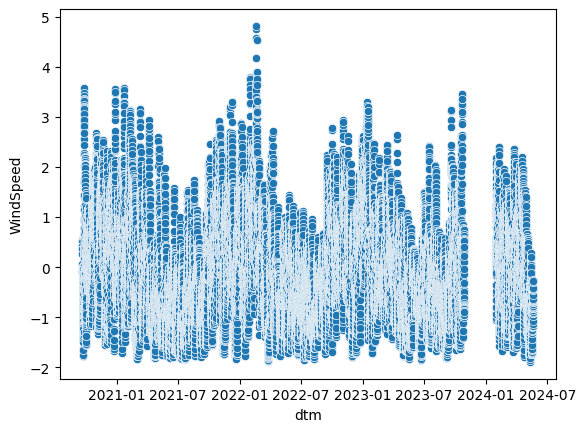

In [57]:
import seaborn as sns

sns.scatterplot(merged_hornsea, x = "dtm", y = "WindSpeed")

<Axes: xlabel='dtm', ylabel='Wind_MWh_credit'>

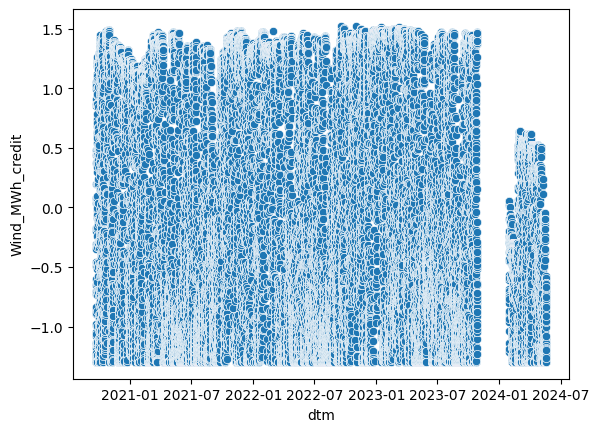

In [58]:
sns.scatterplot(merged_hornsea, x = "dtm", y = "Wind_MWh_credit")

<Axes: xlabel='dtm', ylabel='SolarDownwardRadiation'>

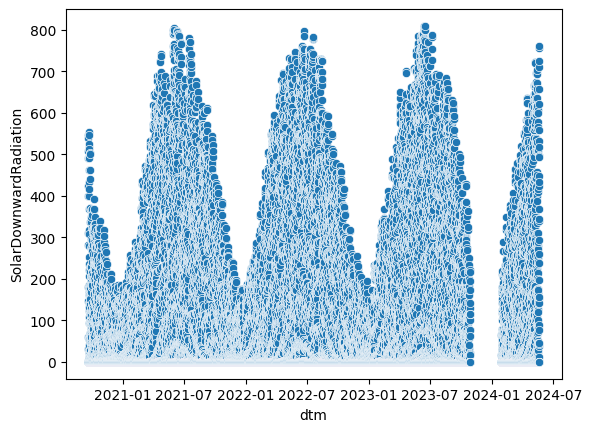

In [34]:
sns.scatterplot(merged_pes, x = "dtm", y = "SolarDownwardRadiation")

<Axes: xlabel='dtm', ylabel='Temperature'>

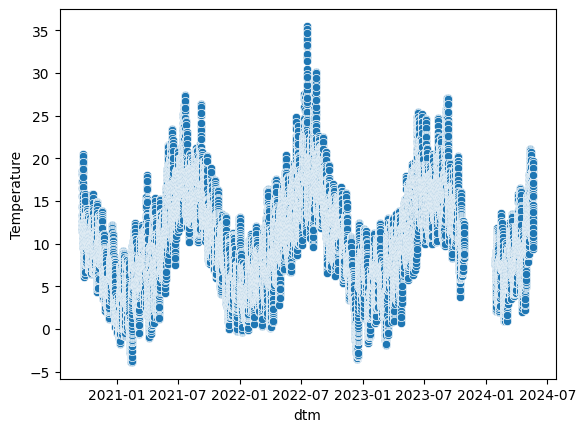

In [75]:
sns.scatterplot(merged_demand, x = "dtm", y = "Temperature")

<Axes: xlabel='WindSpeed', ylabel='Wind_MWh'>

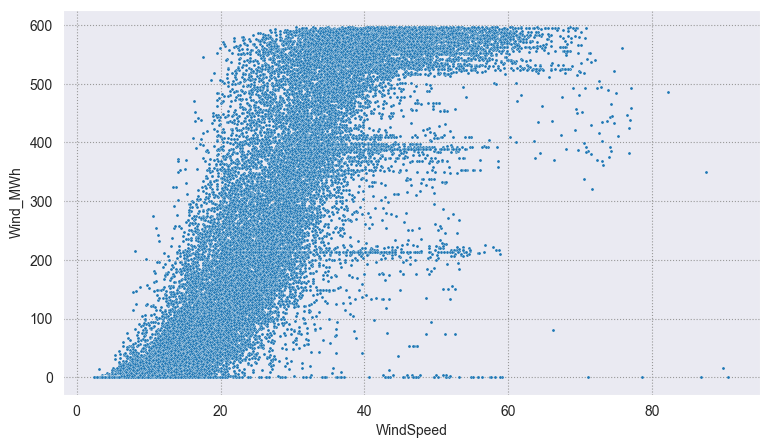

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(merged_hornsea, x = "WindSpeed", y = "Wind_MWh", s = 5)

<Axes: xlabel='WindSpeed:100', ylabel='Wind_MWh'>

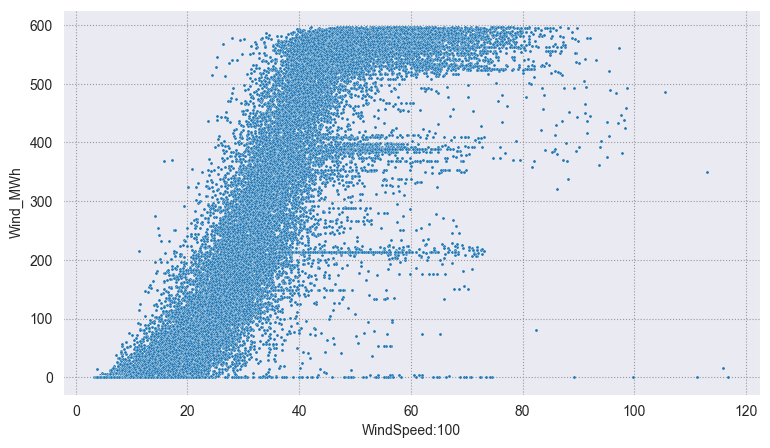

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(merged_hornsea, x = "WindSpeed:100", y = "Wind_MWh", s = 5)

In [37]:
merged_hornsea.columns

Index(['RelativeHumidity', 'Temperature', 'WindSpeed', 'WindSpeed:100',
       'RelativeHumidity_std', 'Temperature_std', 'WindDirection_std',
       'WindDirection:100_std', 'WindSpeed_std', 'WindSpeed:100_std',
       'RelativeHumidity_mean', 'Temperature_mean', 'WindDirection_mean',
       'WindDirection:100_mean', 'WindSpeed_mean', 'WindSpeed:100_mean',
       'RelativeHumidity_min', 'Temperature_min', 'WindDirection_min',
       'WindDirection:100_min', 'WindSpeed_min', 'WindSpeed:100_min',
       'RelativeHumidity_max', 'Temperature_max', 'WindDirection_max',
       'WindDirection:100_max', 'WindSpeed_max', 'WindSpeed:100_max',
       'WindSpeed_range', 'WindSpeed:100_range', 'WindSpeedAltitudeDiff',
       'WindDirection_sin', 'WindDirection_cos', 'WindDirection:100_sin',
       'WindDirection:100_cos', 'Temperature_range', 'MIP', 'Solar_MWh_credit',
       'Solar_capacity_mwp', 'Solar_installedcapacity_mwp', 'SS_Price',
       'boa_MWh', 'DA_Price', 'Wind_MWh_credit', 'unused_S

In [78]:
merged_hornsea.columns

Index(['RelativeHumidity', 'Temperature', 'WindSpeed', 'WindSpeed:100',
       'RelativeHumidity_std', 'Temperature_std', 'WindDirection_std',
       'WindDirection:100_std', 'WindSpeed_std', 'WindSpeed:100_std',
       'RelativeHumidity_mean', 'Temperature_mean', 'WindDirection_mean',
       'WindDirection:100_mean', 'WindSpeed_mean', 'WindSpeed:100_mean',
       'RelativeHumidity_min', 'Temperature_min', 'WindDirection_min',
       'WindDirection:100_min', 'WindSpeed_min', 'WindSpeed:100_min',
       'RelativeHumidity_max', 'Temperature_max', 'WindDirection_max',
       'WindDirection:100_max', 'WindSpeed_max', 'WindSpeed:100_max',
       'WindSpeed_range', 'WindSpeed:100_range', 'WindSpeedAltitudeDiff',
       'WindDirection_sin', 'WindDirection_cos', 'WindDirection:100_sin',
       'WindDirection:100_cos', 'Temperature_range', 'MIP', 'Solar_MWh_credit',
       'Solar_capacity_mwp', 'Solar_installedcapacity_mwp', 'Wind_MWh',
       'SS_Price', 'boa_MWh', 'DA_Price', 'Wind_MWh_credit

<Axes: xlabel='SolarDownwardRadiation', ylabel='Solar_MWh_credit'>

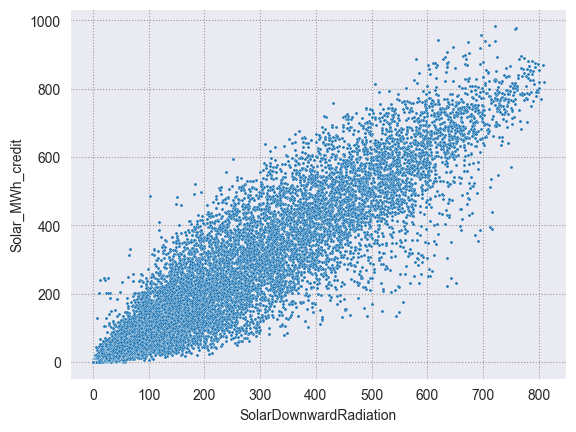

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(merged_pes, x = "SolarDownwardRadiation", y = "Solar_MWh_credit", s = 5)

In [96]:
import plotly.express as px

px.scatter(merged_hornsea[merged_hornsea["WindSpeed"] < 10], x = merged_hornsea[merged_hornsea["WindSpeed"] < 10].index, y = ["WindSpeed", "Wind_MWh_credit"])

In [82]:
merged_pes.columns

Index(['CloudCover', 'SolarDownwardRadiation', 'Temperature', 'CloudCover_std',
       'SolarDownwardRadiation_std', 'Temperature_std', 'CloudCover_mean',
       'SolarDownwardRadiation_mean', 'Temperature_mean', 'CloudCover_min',
       'SolarDownwardRadiation_min', 'Temperature_min', 'CloudCover_max',
       'SolarDownwardRadiation_max', 'Temperature_max',
       'SolarDownwardRadiation_range',
       'Interaction_SolarDownwardRadiation_Temperature', 'Temperature_range',
       'MIP', 'Solar_MWh_credit', 'Solar_capacity_mwp',
       'Solar_installedcapacity_mwp', 'Wind_MWh', 'SS_Price', 'boa_MWh',
       'DA_Price', 'Wind_MWh_credit', 'unused_Solar_capacity_mwp', 'sin_month',
       'cos_month', 'sin_day', 'cos_day', 'sin_dayofweek', 'cos_dayofweek',
       'sin_hour', 'cos_hour', 'sin_minute', 'cos_minute', 'mrid',
       'unavailabilityType', 'affectedUnit', 'normalCapacity',
       'availableCapacity', 'unavailableCapacity', 'hoursSinceOutage',
       'hoursUntilOutageEnd', 'outag

<Axes: xlabel='dtm', ylabel='DA_Price'>

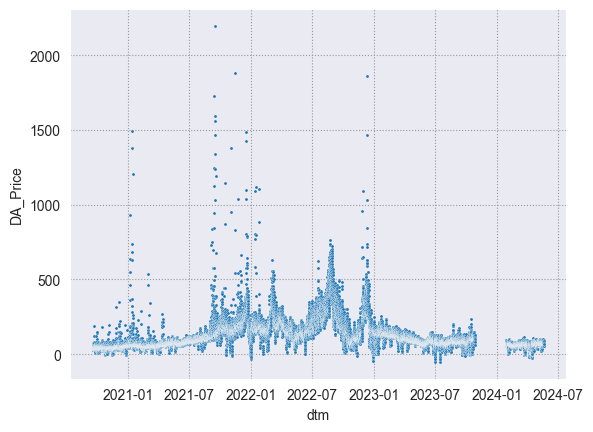

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(merged_hornsea, x = "dtm", y = "DA_Price", s = 5)

Features und Labels

Forecasting: Solar_MWh, Wind_MWh

Trading: Handelbarer Strom